In [1]:
# Analysis of Forbes Billionaires of 2021

# Objective of the data analysis

# 1. Geospatial analysis - to find out the countries with the most billionaires

# 2. Industry - to find out which industries produced the most number of billionaire

# 3. Identity the youngest billionaires, relationship between age and ranking

In [2]:
#Importing required libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import seaborn as sns

In [3]:
#importing the dataset

billionaire_df = pd.read_csv(r'C:\Users\Wande\Desktop\Portfolio_Projects\Forbes_billionaires_analysis\Billionaire.csv')
billionaire_df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [4]:
billionaire_df.shape

(2755, 7)

In [5]:
#dataset summary

billionaire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
Name        2755 non-null object
NetWorth    2755 non-null object
Country     2755 non-null object
Source      2755 non-null object
Rank        2755 non-null int64
Age         2676 non-null float64
Industry    2755 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [6]:
#Checking columns for missing values

billionaire_df.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [7]:
#Checking rows for NaN

nan_df = billionaire_df[billionaire_df.isna().any(axis = 1)]
nan_df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
132,Hinduja brothers,$14.9 B,United Kingdom,diversified,133,NaN,Diversified
255,Lam Wai-ying,$9.1 B,Hong Kong,smartphone screens,256,NaN,Manufacturing
268,Chan Tan Ching-fen,$8.8 B,Hong Kong,real estate,269,NaN,Real Estate
285,Anthony von Mandl,$8.7 B,Canada,alcoholic beverages,274,NaN,Food & Beverage
294,Kuldip Singh & Gurbachan Singh Dhingra,$8.4 B,India,paints,294,NaN,Manufacturing


In [8]:
#dropping all rows containing NaN

billionaire_df = billionaire_df.dropna()
billionaire_df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [9]:
#confirming NaN has been removed

nan_df = billionaire_df[billionaire_df.isna().any(axis = 1)]
nan_df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry


In [10]:
#Converting column to the correct type

#removing the 'B' symbol
billionaire_df['Net Worth (Billion $)'] = billionaire_df['NetWorth'].apply(lambda x: x.split(' ')[0])

#removing the '$' symbol
billionaire_df['Net Worth (Billion $)'] = billionaire_df['Net Worth (Billion $)'].apply(lambda x: x.replace('$', ''))

#converting 'Net Worth (Billion $)' from str to numeric(float)
billionaire_df['Net Worth (Billion $)'] = pd.to_numeric(billionaire_df['Net Worth (Billion $)'])

#converting Age column to int
billionaire_df['Age'] = billionaire_df['Age'].astype('int64')

#dropping the 'NetWorth' column
billionaire_df.drop('NetWorth', axis=1, inplace=True)

billionaire_df.head()


,Name,Country,Source,Rank,Age,Industry,Net Worth (Billion $)
0,Jeff Bezos,United States,Amazon,1,57,Technology,177.0
1,Elon Musk,United States,"Tesla, SpaceX",2,49,Automotive,151.0
2,Bernard Arnault & family,France,LVMH,3,72,Fashion & Retail,150.0
3,Bill Gates,United States,Microsoft,4,65,Technology,124.0
4,Mark Zuckerberg,United States,Facebook,5,36,Technology,97.0


In [11]:
billionaire_df.describe()

,Rank,Age,Net Worth (Billion $)
count,2676.000000,2676.000000,2676.000000
mean,1343.791106,63.113602,4.796525
std,773.724884,13.445153,9.743198
min,1.000000,18.000000,1.000000
25%,680.000000,54.000000,1.500000
50%,1362.000000,63.000000,2.300000
75%,2035.000000,73.000000,4.200000
max,2674.000000,99.000000,177.000000


In [12]:
#Question 1. Geospatial analysis - to find out the countries with the most billionaires

#count the number of billionaires for each country
bill_count = billionaire_df['Country'].value_counts()
top_bill_count = bill_count.head(10)
top_bill_count

United States     720
China             610
India             134
Russia            118
Germany           115
Hong Kong          68
Brazil             61
Canada             60
United Kingdom     54
Italy              49
Name: Country, dtype: int64

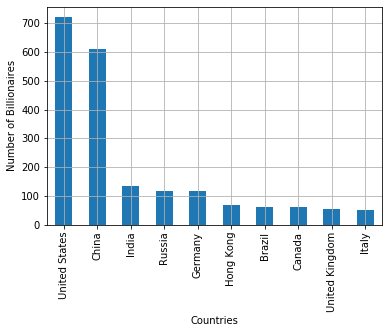

In [13]:
top_bill_count.plot(kind = 'bar')
plt.xlabel('Countries')
plt.ylabel('Number of Billionaires')
plt.grid()
plt.show()

In [14]:
# 2. Industry - to find out which industries produced the most number of billionaire

ind_count = pd.DataFrame(billionaire_df['Industry'].value_counts())
ind_count

,Industry
Finance & Investments,365
Technology,355
Manufacturing,317
Fashion & Retail,268
Healthcare,213
Real Estate,211
Food & Beverage,204
Diversified,180
Energy,99
Media & Entertainment,92


Text(0, 0.5, 'Industry')

<Figure size 1080x864 with 0 Axes>

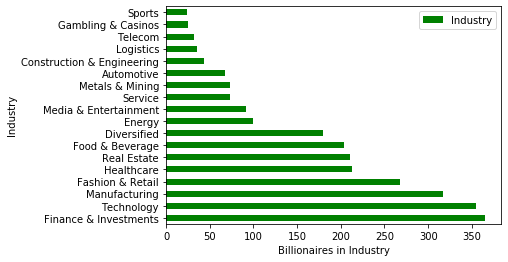

In [15]:
plt.figure(figsize=(15, 12))
ind_count.plot(kind='barh', color='g')
plt.xlabel('Billionaires in Industry')
plt.ylabel('Industry')

In [16]:
# 3. Identity the youngest billionaires, relationship between age and ranking

In [17]:
billionaire_df.head()

,Name,Country,Source,Rank,Age,Industry,Net Worth (Billion $)
0,Jeff Bezos,United States,Amazon,1,57,Technology,177.0
1,Elon Musk,United States,"Tesla, SpaceX",2,49,Automotive,151.0
2,Bernard Arnault & family,France,LVMH,3,72,Fashion & Retail,150.0
3,Bill Gates,United States,Microsoft,4,65,Technology,124.0
4,Mark Zuckerberg,United States,Facebook,5,36,Technology,97.0


In [18]:
#Placing forbes billionaire into three categories according to 'Age' and assignng them into a new 'Age Group' column 
# less than or equal to 40 years = Young
# less than or equal to 55 years = Mid_Age
# greater than or equal to 55 = Old

billionaire_df['Age Group'] = billionaire_df['Age'].apply(lambda x: 'Young' if x <= 40 else ('Mid-Age' if x <= 55 else 'Old'))
billionaire_df.head()

,Name,Country,Source,Rank,Age,Industry,Net Worth (Billion $),Age Group
0,Jeff Bezos,United States,Amazon,1,57,Technology,177.0,Old
1,Elon Musk,United States,"Tesla, SpaceX",2,49,Automotive,151.0,Mid-Age
2,Bernard Arnault & family,France,LVMH,3,72,Fashion & Retail,150.0,Old
3,Bill Gates,United States,Microsoft,4,65,Technology,124.0,Old
4,Mark Zuckerberg,United States,Facebook,5,36,Technology,97.0,Young


In [19]:
billionaire_df.groupby('Age Group').size()

Age Group
Mid-Age     683
Old        1872
Young       121
dtype: int64

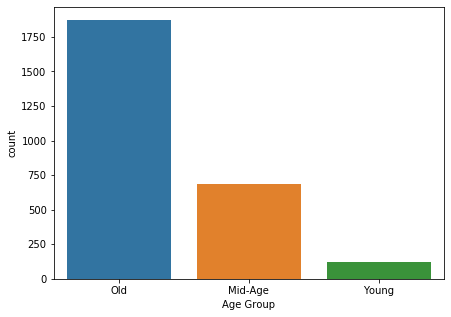

In [51]:
plt.figure(figsize=(7, 5))
sns.countplot(billionaire_df['Age Group'])
plt.show()